## Overview:
In this project, I will create a simple convolutional neural network [CNN] to classify handwriting digits using MNIST dataset using TensorFlow
The main goal is to deploy this network to android app using TFLite


## Requirements:
- Python 3
- Tensorflow v2 (I used v2.1.0)
- Android Studio (I used the latest v3.6.3)

## Find Me:
| | |
|-|-|
|Mail:     |ibrahimomar357@gmail.com |
|GitHub:   |https://github.com/IbrahimOmar91 |
|LinkedIn: |https://www.linkedin.com/in/ibrahimomar91/ |
|Facebook: |https://www.facebook.com/IbrahimM.Omar91 |

Imports

In [2]:
import numpy as np
import tensorflow
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer, Reshape, Dropout
from tensorflow.keras.utils import plot_model

Load MNIST Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Normalize data images

In [4]:
x_train = (x_train/255.).astype(np.float32)
x_test  = (x_test/255.).astype(np.float32)

Create TF Model

In [5]:
model = Sequential([
    InputLayer(input_shape=(28, 28)),
    Reshape(target_shape=(28, 28, 1)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    
    Dense(512),
    Dense(64),
    Dense(10, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 256)         0

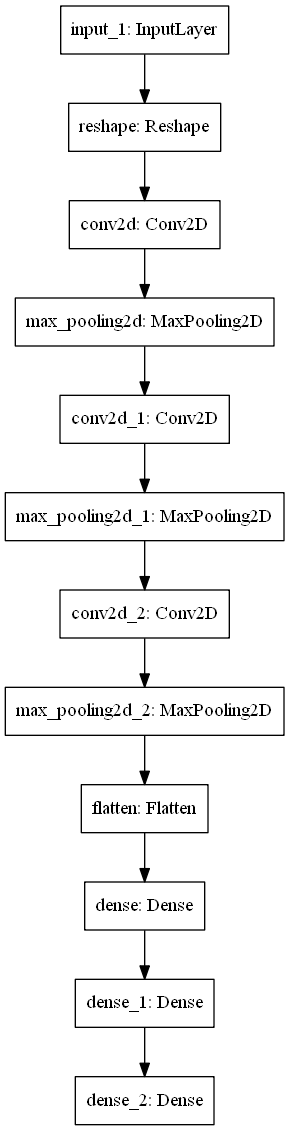

In [7]:
plot_model(model, to_file='model.png')

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
hist = model.fit(
    x_train,
    y_train,
    epochs = 6,
    batch_size = 512,
    validation_data=(x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 7s 124us/sample - loss: 0.3900 - accuracy: 0.8823 - val_loss: 0.1255 - val_accuracy: 0.9580
Epoch 2/6
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0855 - accuracy: 0.9734 - val_loss: 0.0751 - val_accuracy: 0.9774
Epoch 3/6
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0590 - accuracy: 0.9818 - val_loss: 0.0732 - val_accuracy: 0.9780
Epoch 4/6
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0474 - accuracy: 0.9858 - val_loss: 0.0555 - val_accuracy: 0.9828
Epoch 5/6
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0366 - accuracy: 0.9888 - val_loss: 0.0489 - val_accuracy: 0.9845
Epoch 6/6
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0291 - accuracy: 0.9910 - val_loss: 0.0457 - val_accuracy: 0.9870


### Visualise Training Process

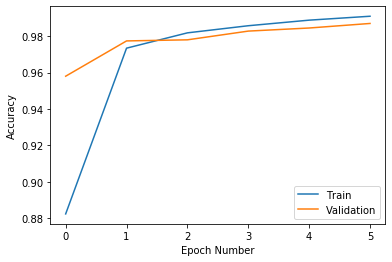

In [10]:
import matplotlib.pyplot as plt

plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(('Train','Validation'), loc='lower right')

### Evaluate Model

In [11]:
out = model.evaluate(x_test, y_test)
print ("Accuracy: {:0.2f}%".format(out[1]*100))

10000/10000 [==============================] - 1s 104us/sample - loss: 0.0457 - accuracy: 0.9870
Accuracy: 98.70%


### Predict On Single Image

True Label: 1	 Predicted: 1




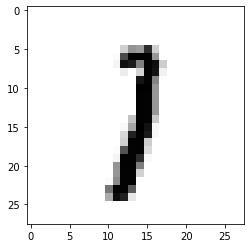

In [19]:
import matplotlib.pyplot as plt
from random import randint

image_index = randint(0, 10000)
pred = model.predict([[x_test[image_index]]])

print ('True Label: {}\t Predicted: {}\n\n'.format(y_test[image_index], np.argmax(pred)))
plt.imshow(x_test[image_index], cmap='Greys')

### Convert Model to TFLite and Save

In [54]:
converter = tensorflow.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [55]:
tflite_model_file = "mnist_model.tflite"
open(tflite_model_file, 'wb').write(tflite_model)

2142616